<h1>Lending Club Loan Data Analysis</h1>

**DESCRIPTION**

Create a model that predicts whether or not a loan will be default using the historical data.

**Problem Statement:**

For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that make this problem more challenging.

**Domain:** Finance

**Analysis to be done:** Perform data preprocessing and build a deep learning prediction model. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings ('ignore')

In [2]:
pd.read_csv("D:\PG_DSBA_Business_Analytics_\Deep learning\Assessment\\loan_data.csv")

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [3]:
loan_df=pd.read_csv("D:\PG_DSBA_Business_Analytics_\Deep learning\Assessment\\loan_data.csv")

In [4]:
loan_df["purpose"].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [5]:
from sklearn.preprocessing import LabelEncoder
enc= LabelEncoder()

In [6]:
enc.fit_transform(loan_df["purpose"])

array([2, 1, 2, ..., 2, 4, 2])

In [7]:
loan_df["purpose"]=enc.fit_transform(loan_df["purpose"])

In [8]:
loan_df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,2,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,4,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [9]:
loan_df.dtypes

credit.policy          int64
purpose                int32
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [10]:
loan_df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [11]:
num_df=loan_df[['int.rate','installment','log.annual.inc','dti','fico','days.with.cr.line','revol.bal','revol.util']]

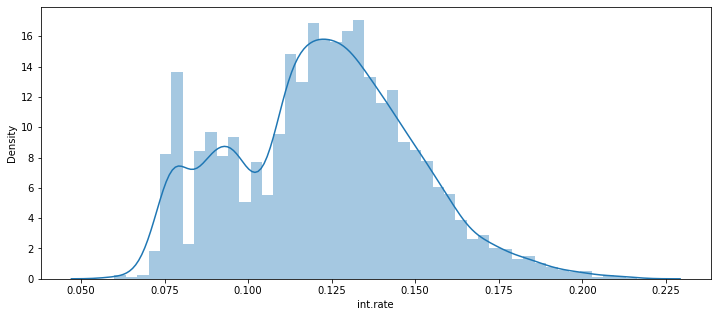

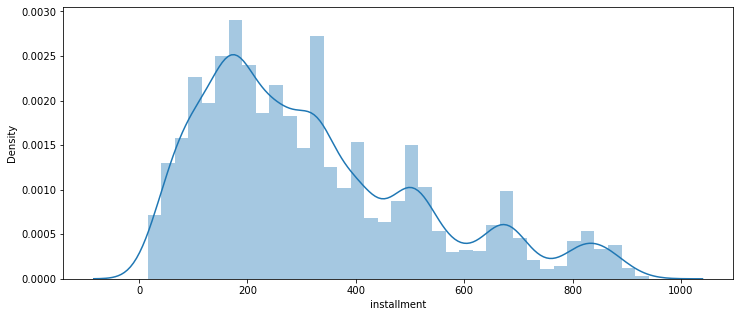

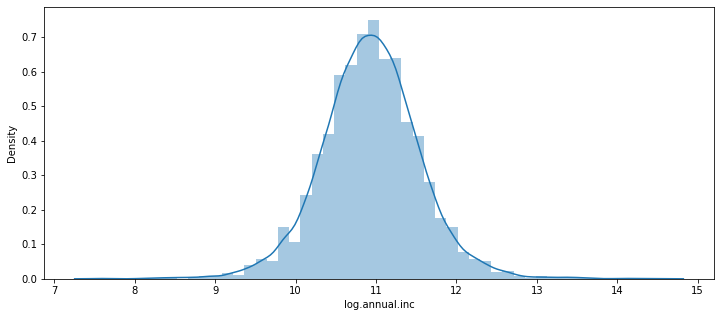

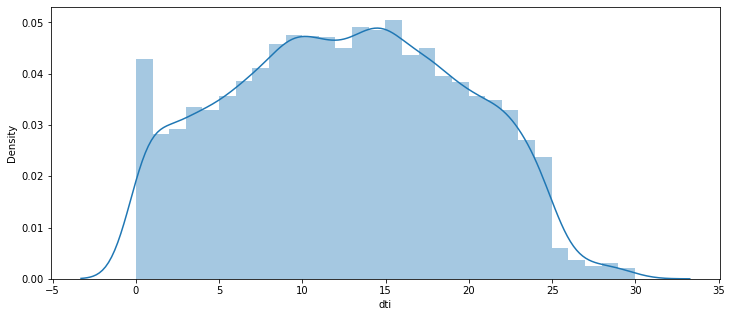

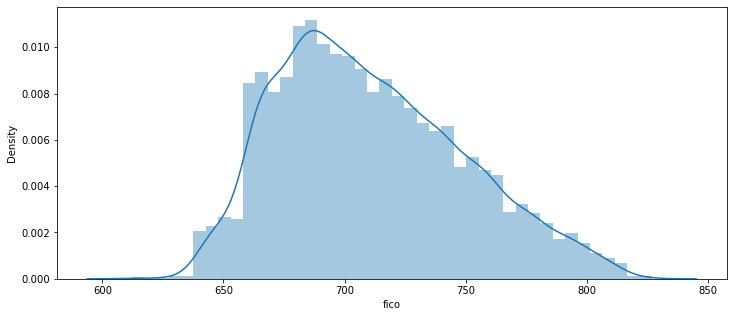

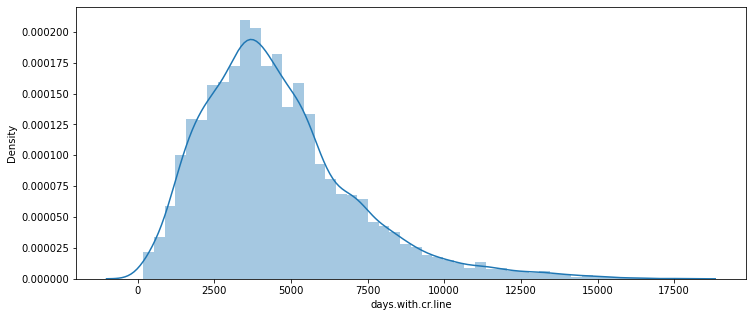

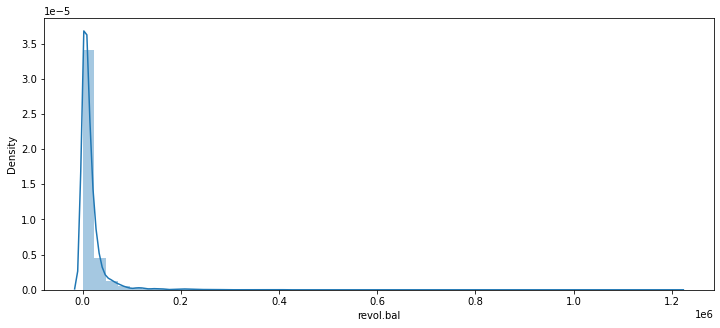

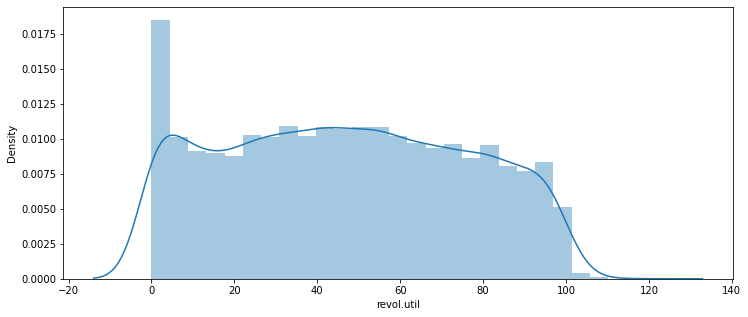

In [12]:
for col in num_df:
    plt.figure(figsize=(12,5))
    sns.distplot(loan_df[col])

In [13]:
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02


<AxesSubplot:xlabel='installment', ylabel='Density'>

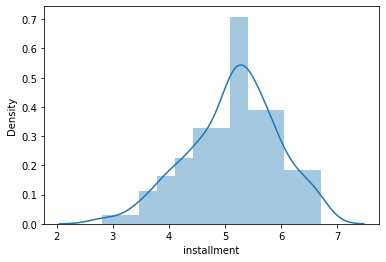

In [134]:
sns.distplot(np.log1p(num_df["installment"]))

In [17]:
from feature_engine import transformation as vt

# set up the variable transformer
tf = vt.YeoJohnsonTransformer(variables = ['int.rate','installment','log.annual.inc','dti','fico','days.with.cr.line','revol.bal','revol.util'])

# fit the transformer
tf.fit(num_df)

# transform the data
xr_num_df= tf.transform(num_df)

In [21]:
xr_num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
int.rate,9578.0,0.104727,1.973646e-02,0.055566,0.091237,0.104952,0.118374,0.167487
installment,9578.0,14.005339,3.499104e+00,4.336776,11.637674,13.947490,16.498354,21.492479
log.annual.inc,9578.0,10.859229,6.088702e-01,7.505336,10.489178,10.856088,11.214972,14.418831
dti,9578.0,8.430498,4.099460e+00,0.000000,5.409728,8.712448,11.650786,17.764043
fico,9578.0,0.319379,6.126037e-11,0.319379,0.319379,0.319379,0.319379,0.319379
days.with.cr.line,9578.0,54.977015,1.194602e+01,15.561547,47.397866,54.965626,62.259110,95.378955
revol.bal,9578.0,30.723180,1.252970e+01,0.000000,23.780642,31.069752,37.839265,107.443228
revol.util,9578.0,17.864072,9.115002e+00,0.000000,11.155190,18.789759,25.466852,36.695088


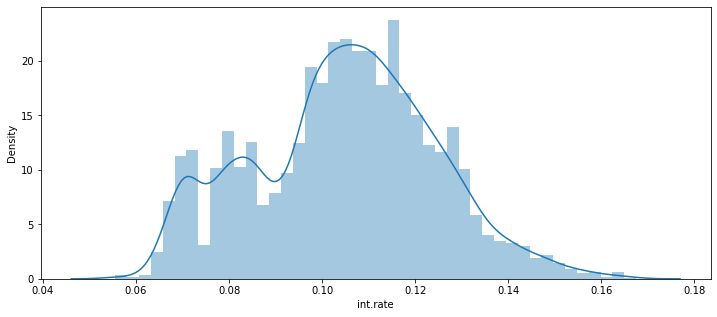

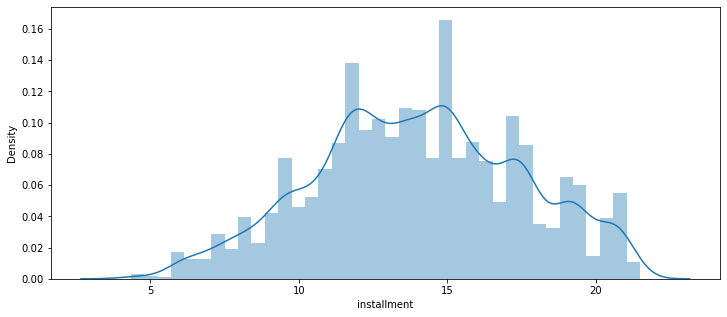

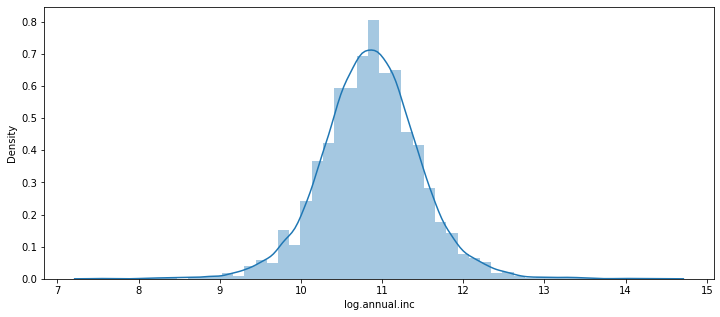

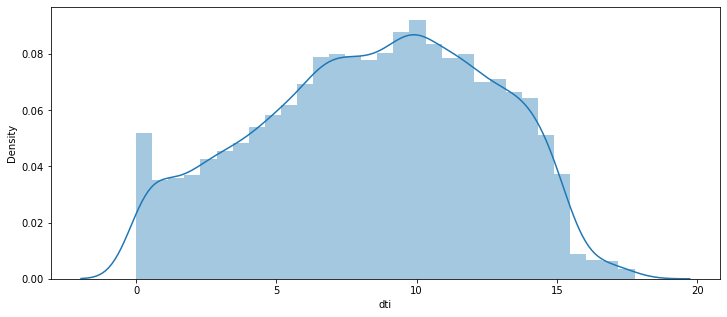

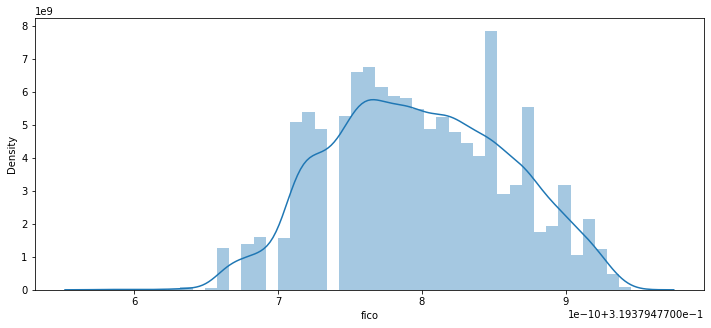

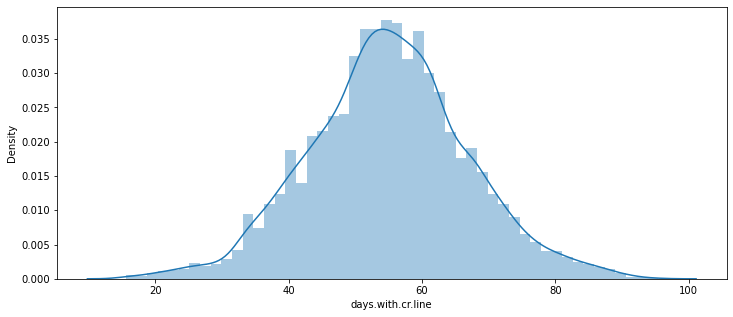

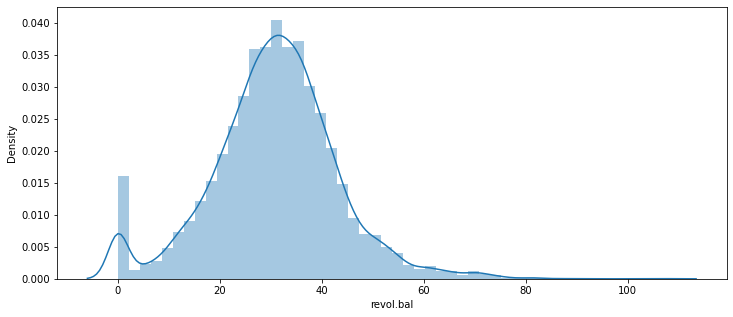

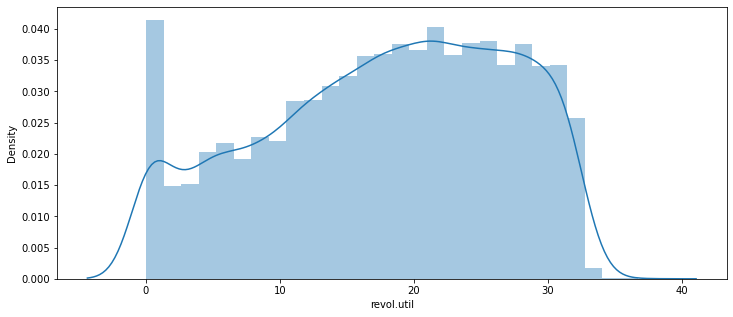

In [19]:
for col in xr_num_df:
    plt.figure(figsize=(12,5))
    sns.distplot(xr_num_df[col])

In [49]:
xr_num_df.corr()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util
int.rate,1.000000,0.259744,0.054340,0.220280,-0.725598,-0.136037,0.141996,0.457296
installment,0.259744,1.000000,0.445651,0.062126,0.096816,0.209516,0.318760,0.089877
log.annual.inc,0.054340,0.445651,1.000000,-0.051824,0.114683,0.388850,0.422048,0.051723
dti,0.220280,0.062126,-0.051824,1.000000,-0.227947,0.093567,0.368488,0.356907
fico,-0.725598,0.096816,0.114683,-0.227947,1.000000,0.274716,-0.093899,-0.529300
days.with.cr.line,-0.136037,0.209516,0.388850,0.093567,0.274716,1.000000,0.317435,-0.005303
revol.bal,0.141996,0.318760,0.422048,0.368488,-0.093899,0.317435,1.000000,0.530399
revol.util,0.457296,0.089877,0.051723,0.356907,-0.529300,-0.005303,0.530399,1.000000


<AxesSubplot:>

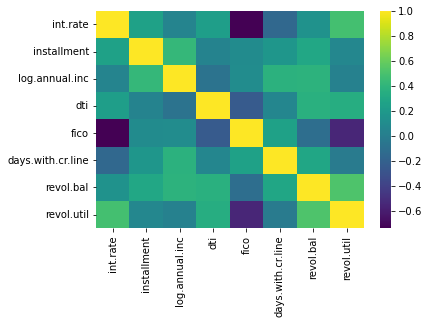

In [50]:
sns.heatmap(num_final.corr(),cmap='viridis')

In [53]:
# concatenate 
pd.concat([xr_num_df,loan_df[["credit.policy","purpose","inq.last.6mths","delinq.2yrs","pub.rec","not.fully.paid"]]],1)

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,credit.policy,purpose,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,0.102583,20.605475,11.273506,12.467226,0.319379,61.883201,42.578007,20.448191,1,2,0,0,0,0
1,0.093692,13.145587,11.007861,9.637935,0.319379,47.004650,44.276121,26.926535,1,1,0,0,0,0
2,0.114823,15.572202,10.306015,8.110935,0.319379,57.756847,24.420102,12.225867,1,2,1,0,0,0
3,0.088841,11.599771,11.273506,5.973022,0.319379,46.605702,44.290901,26.050039,1,2,1,0,0,0
4,0.119713,9.758462,11.223328,10.018973,0.319379,54.585999,26.496515,16.759817,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0.122163,15.235219,12.095607,7.376375,0.319379,78.326312,70.526545,28.254500,0,0,2,0,0,1
9574,0.107303,13.735130,11.066999,0.205708,0.319379,56.168938,10.181066,0.965069,0,0,5,0,0,1
9575,0.093692,9.567630,10.527034,8.956636,0.319379,51.239566,32.367248,28.448854,0,2,8,0,0,1
9576,0.131703,15.340807,10.748036,12.308182,0.319379,39.799336,0.000000,2.431999,0,4,5,0,0,1


In [54]:
final_df=pd.concat([xr_num_df,loan_df[["credit.policy","purpose","inq.last.6mths","delinq.2yrs","pub.rec","not.fully.paid"]]],1)

In [55]:
final_df.to_csv("loan_data.csv")